# Exercise 2

## Analyze class homeworks


In [5]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Consolidado_respuestas_escribir_v2.xlsx')
data.head()

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...


# Exercise 2.1

Analyze the writing patterns of each student


## Limpieza de los datos


A continuación se removerán los stopword y se tokenizará


In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("stopwords")
nltk.download("punkt")

# Obtener las listas de stopwords en español e inglés
stopwords_spanish = set(stopwords.words("spanish"))
stopwords_english = set(stopwords.words("english"))

# Crear un nuevo DataFrame para almacenar los resultados del preprocesamiento
preprocessed_data = data[
    ["Genero"]
].copy()  # Crear un DataFrame con la columna 'Genero'


# Función para preprocesar texto en ambos idiomas
def preprocess_text(text):
    if isinstance(text, str):  # Verificar si el valor es una cadena de texto
        text = text.lower()  # Convertir a minúsculas
        words = word_tokenize(text)  # Tokenización

        # Eliminar stopwords en español e inglés
        words = [
            word for word in words if word.isalpha()
        ]  # Eliminar signos de puntuación y números
        words = [
            word
            for word in words
            if word not in stopwords_spanish and word not in stopwords_english
        ]  # Eliminar stopwords

        return " ".join(words)
    else:
        return str(text)  # Mantener valores numéricos y no cadenas de texto


# Aplicar preprocesamiento a cada columna de tarea (excepto 'Genero')
for columna in data.columns[1:]:
    preprocessed_data[columna] = data[columna].apply(preprocess_text)

# Ahora, preprocessed_data contiene la columna 'Genero' sin procesar y las demás columnas preprocesadas

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
# Convertir el índice en una columna
preprocessed_data.reset_index(inplace=True)
preprocessed_data.rename(columns={"index": "Estudiante"}, inplace=True)
preprocessed_data

,Estudiante,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,0,M,one valuable application time series analysis ...,main difference panel data time series kind da...,decision tree model used analytics community u...,used make better prediction utilizing single o...,forma arquitectura datos microservicios hacen ...,nan
1,1,F,análisis series tiempo usos análisis series ti...,series tiempo vs datos panel serie tiempo perm...,tipos árboles decisión aplicaciones árboles de...,ensamblaje machine learning métodos ensamblaje...,microservicios objetivo principal implementaci...,nan
2,2,M,serie tiempo colección datos valores variable ...,nan,arboles decisión hacen parte algoritmos aprend...,ensemble methods machine learning technique co...,enfoque tradicional diseño aplicaciones centra...,lexisnexis launched lexis analytics legal rese...
3,3,M,given time series analysis allows understand p...,difference panel data time series dimensional ...,decision trees algorithms machine function tec...,ensemble methods tree decision algorithms brin...,defined type software architecture everyone fu...,nan
4,4,M,time series analysis concerned study interpret...,time series represented variable set variables...,decision trees popular supervised machine lear...,ensemble method combination several machine le...,microservice type information technology cloud...,commercial product uses natural language proce...
5,5,M,time series set data taken interval time days ...,aunque variables tiempo paneles datos basados ...,modelos supervisados pueden usar arboles decis...,nan,microservicios servicios web alcances puntuale...,nan
6,6,M,nan,paso crucial empezar predecir datos general mo...,árboles decisión algoritmos pertenecen familia...,machine learning métodos ensamble principalmen...,arquitectura microservicios simplemente micros...,nan
7,7,M,análisis series tiempo tsa diversidad aplicaci...,panel datos consiste conjunto observaciones co...,árboles decisión consisten métodos aprendizaje...,métodos ensamble permiten mejorar desempeño mo...,microservicios arquitectura microservicios est...,nan
8,8,F,ejemplo número estudiantes semestrales inscrit...,serie tiempo busca modelar comportamiento indi...,algoritmos machine learning supervisados princ...,nan,microservicios tipo arquitectura construcción ...,nan
9,9,M,pronósticos producción análisis inflación prec...,serie tiempo contiene observaciones único fenó...,arboles decisión árboles decisión representaci...,método ensamblaje técnica machine learning com...,microservicios arquitectura desarrollo softwar...,nan


Analizar cada estudiante


Longitud de las tareas y Palabras únicas usadas por cada estudiante


In [35]:
import pandas as pd
from nltk.probability import FreqDist

resultados = pd.DataFrame()

# Calcular la longitud de cada tarea por estudiante
resultados["Estudiante"] = preprocessed_data.index
resultados["Longitud promedio de vocabulario"] = preprocessed_data.iloc[:, 3:].apply(
    lambda x: round(x.str.len().mean()), axis=1
)
# Calcular la cantidad de palabras únicas que usa cada estudiante en todas las tareas
resultados["Palabras Únicas"] = preprocessed_data.iloc[:, 3:].apply(
    lambda x: len(set(" ".join(x).split())), axis=1
)

print(resultados)

    Estudiante  Longitud promedio de vocabulario  Palabras Únicas
0            0                               875              349
1            1                              1147              429
2            2                              1060              414
3            3                               937              304
4            4                              1495              540
5            5                               701              267
6            6                              1256              411
7            7                               952              326
8            8                               337              153
9            9                               592              263
10          10                               839              334
11          11                              1095              404
12          12                               999              345
13          13                               234              113
14        

Imprimir las 5 palabras que más usa cada estudiante en la totalidad de sus tareas


In [47]:
from collections import Counter

# Crear una lista para almacenar las 5 palabras más comunes por estudiante
top_5_words_por_estudiante = []

for index, row in nueva_tabla.iterrows():
    # Obtener las palabras tokenizadas del estudiante actual
    palabras_estudiante = row["Concatenacion_Tokenizada"]

    # Contar la frecuencia de cada palabra
    word_freq = Counter(palabras_estudiante)

    # Obtener las 5 palabras más comunes para este estudiante
    top_5_words = word_freq.most_common(5)

    # Agregar las 5 palabras más comunes al resultado
    top_5_words_por_estudiante.append(
        {"Estudiante": row["Estudiante"], "PalabrasMasComunes": top_5_words}
    )

# Imprimir las 5 palabras más comunes por estudiante
for estudiante_resultado in top_5_words_por_estudiante:
    print(f"Estudiante: {estudiante_resultado['Estudiante']}")
    print("Palabras más comunes:")
    for palabra, freq in estudiante_resultado["PalabrasMasComunes"]:
        print(f"{palabra}: {freq}")
    print()

Estudiante: 0
Palabras más comunes:
data: 14
decision: 11
one: 10
time: 9
used: 9

Estudiante: 1
Palabras más comunes:
https: 15
tiempo: 11
modelos: 10
permite: 9
manera: 9

Estudiante: 2
Palabras más comunes:
decisión: 10
ensemble: 10
tiempo: 8
arboles: 8
variable: 7

Estudiante: 3
Palabras más comunes:
data: 19
decision: 15
trees: 12
different: 11
methods: 11

Estudiante: 4
Palabras más comunes:
data: 16
time: 14
type: 11
trees: 10
learning: 10

Estudiante: 5
Palabras más comunes:
datos: 12
modelos: 12
time: 10
información: 9
series: 7

Estudiante: 6
Palabras más comunes:
datos: 16
modelos: 14
cada: 11
tiempo: 9
modelo: 9

Estudiante: 7
Palabras más comunes:
tiempo: 15
datos: 13
predicción: 12
árboles: 11
series: 10

Estudiante: 8
Palabras más comunes:
ejemplo: 5
datos: 5
diferentes: 4
demanda: 4
tiempo: 4

Estudiante: 9
Palabras más comunes:
manera: 5
decisión: 5
cada: 5
modelos: 5
datos: 4

Estudiante: 10
Palabras más comunes:
cada: 12
microservicios: 10
tiempo: 9
aplicaciones: 9
s

# Exercise 2.2

Evaluate the similarities of the homeworks of the students.

At a homework level, then as a student level.


In [45]:
# Seleccionar las 2 primeras columnas
nueva_tabla = preprocessed_data.iloc[:, :2]

# Concatenar las siguientes 6 columnas
nueva_tabla["Concatenacion"] = preprocessed_data.iloc[:, 2:8].apply(
    lambda row: " ".join(row), axis=1
)
print(nueva_tabla)

    Estudiante Genero                                      Concatenacion
0            0      M  one valuable application time series analysis ...
1            1      F  análisis series tiempo usos análisis series ti...
2            2      M  serie tiempo colección datos valores variable ...
3            3      M  given time series analysis allows understand p...
4            4      M  time series analysis concerned study interpret...
5            5      M  time series set data taken interval time days ...
6            6      M  nan paso crucial empezar predecir datos genera...
7            7      M  análisis series tiempo tsa diversidad aplicaci...
8            8      F  ejemplo número estudiantes semestrales inscrit...
9            9      M  pronósticos producción análisis inflación prec...
10          10      M  sector financiero hace uso constante series ti...
11          11      F  series tiempo básicamente colección datos regi...
12          12      M  ejemplo uso series tiempo pr

Similitud entre estudiantes


In [46]:
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Tokenizar la columna 'Concatenacion'
nueva_tabla["Concatenacion_Tokenizada"] = nueva_tabla["Concatenacion"].apply(
    word_tokenize
)

# Crear un vectorizador TF-IDF para convertir los textos tokenizados en vectores
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(
    nueva_tabla["Concatenacion_Tokenizada"].apply(lambda x: " ".join(x))
)

# Calcular la similitud de coseno entre los estudiantes
student_similarity_matrix = cosine_similarity(tfidf_matrix)


student_similarity_df = pd.DataFrame(
    student_similarity_matrix,
    columns=nueva_tabla["Estudiante"],
    index=nueva_tabla["Estudiante"],
)

print("Matriz de Similitud de Estudiantes:")
print(student_similarity_df)

Matriz de Similitud de Estudiantes:
Estudiante        0         1         2         3         4         5   \
Estudiante                                                               
0           1.000000  0.039896  0.209713  0.393529  0.344654  0.153292   
1           0.039896  1.000000  0.153534  0.013268  0.032845  0.164841   
2           0.209713  0.153534  1.000000  0.236466  0.205353  0.129337   
3           0.393529  0.013268  0.236466  1.000000  0.372896  0.158857   
4           0.344654  0.032845  0.205353  0.372896  1.000000  0.164444   
5           0.153292  0.164841  0.129337  0.158857  0.164444  1.000000   
6           0.050684  0.236351  0.148881  0.018507  0.018400  0.189204   
7           0.071155  0.264745  0.148164  0.034493  0.036004  0.170506   
8           0.029491  0.162632  0.117481  0.012430  0.012298  0.126217   
9           0.041625  0.206125  0.133386  0.016199  0.017916  0.128675   
10          0.071992  0.227650  0.169050  0.012106  0.013000  0.128047   
11

Matriz de similitud de tareas para cada estudiante


In [50]:
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

matrices_similitud_por_estudiante = []

# Iterar a través de los estudiantes
for estudiante in preprocessed_data["Estudiante"]:
    tareas_estudiante = preprocessed_data[
        preprocessed_data["Estudiante"] == estudiante
    ].iloc[:, 2:8]
    tareas_tokenizadas = []
    for columna in tareas_estudiante.columns:
        tarea_tokenizada = " ".join(word_tokenize(tareas_estudiante[columna].values[0]))
        tareas_tokenizadas.append(tarea_tokenizada)

    # Crear un vectorizador TF-IDF para convertir el texto en un vector
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(tareas_tokenizadas)

    # Calcular la similitud de coseno entre las 6 tareas del estudiante
    tarea_similarity_matrix = cosine_similarity(tfidf_matrix)

    matrices_similitud_por_estudiante.append(
        {"Estudiante": estudiante, "MatrizSimilitud": tarea_similarity_matrix}
    )

# Mostrar los resultados de similitud por estudiante
for i in range(len(matrices_similitud_por_estudiante)):
    resultado_similitud = matrices_similitud_por_estudiante[i]

    estudiante = resultado_similitud["Estudiante"]

    print(f"Estudiante: {estudiante}")
    print("Matriz de Similitud:")
    print(resultado_similitud["MatrizSimilitud"])

    print("-" * 40)

Estudiante: 0
Matriz de Similitud:
[[1.         0.16364936 0.04038792 0.07311066 0.         0.        ]
 [0.16364936 1.         0.06713084 0.14176787 0.         0.        ]
 [0.04038792 0.06713084 1.         0.19630683 0.00388836 0.        ]
 [0.07311066 0.14176787 0.19630683 1.         0.         0.        ]
 [0.         0.         0.00388836 0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]
----------------------------------------
Estudiante: 1
Matriz de Similitud:
[[1.         0.30929351 0.04596697 0.05724065 0.0386736  0.        ]
 [0.30929351 1.         0.0375058  0.0393305  0.01312482 0.        ]
 [0.04596697 0.0375058  1.         0.11010606 0.10297099 0.        ]
 [0.05724065 0.0393305  0.11010606 1.         0.07132319 0.        ]
 [0.0386736  0.01312482 0.10297099 0.07132319 1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]
----------------------------------------
Estudiante: 2
Matr

# Exercise 2.3

Create a classifier to predict the gender of each student


In [56]:
# Puedes contar las muestras por clase utilizando 'value_counts'
clase_distribucion = nueva_tabla["Genero"].value_counts()

# Mostrar la distribución de clases
print(clase_distribucion)

M    36
F    10
Name: Genero, dtype: int64


Balanceo de los datos


In [57]:
from sklearn.utils import resample

# Supongamos que tienes un DataFrame llamado 'data' con una columna 'Género' que contiene las etiquetas de clase

# Separar las clases en conjuntos separados
clase_mayoritaria = nueva_tabla[nueva_tabla["Genero"] == "M"]
clase_minoritaria = nueva_tabla[nueva_tabla["Genero"] == "F"]

# Hacer sobremuestreo de la clase minoritaria
clase_minoritaria_sobremuestreada = resample(
    clase_minoritaria, replace=True, n_samples=len(clase_mayoritaria), random_state=42
)

# Combinar la clase sobremuestreada con la clase mayoritaria
data_balanceada = pd.concat([clase_mayoritaria, clase_minoritaria_sobremuestreada])

# Mostrar la distribución de clases balanceada
clase_distribucion_balanceada = data_balanceada["Genero"].value_counts()
print(clase_distribucion_balanceada)

M    36
F    36
Name: Genero, dtype: int64


In [58]:
print(data_balanceada)

    Estudiante Genero                                      Concatenacion  \
0            0      M  one valuable application time series analysis ...   
2            2      M  serie tiempo colección datos valores variable ...   
3            3      M  given time series analysis allows understand p...   
4            4      M  time series analysis concerned study interpret...   
5            5      M  time series set data taken interval time days ...   
..         ...    ...                                                ...   
11          11      F  series tiempo básicamente colección datos regi...   
25          25      F  time series seeks predict future variable base...   
11          11      F  series tiempo básicamente colección datos regi...   
30          30      F  importancia empleo series temporales aprendiza...   
25          25      F  time series seeks predict future variable base...   

                             Concatenacion_Tokenizada  
0   [one, valuable, application

Clasificador con datos desbalanceados


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = nueva_tabla["Concatenacion_Tokenizada"].apply(lambda x: " ".join(x))
y = nueva_tabla["Genero"]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Vectorizar el texto utilizando TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Crear un clasificador (Logistic Regression)
classifier = LogisticRegression()

# Entrenar el clasificador
classifier.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test_tfidf)

# Evaluar el rendimiento del clasificador
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Mostrar métricas de clasificación (precision, recall, F1-score, etc.)
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.70
              precision    recall  f1-score   support

           F       0.00      0.00      0.00         3
           M       0.70      1.00      0.82         7

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Clasificador con datos balanceados


In [59]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = data_balanceada["Concatenacion_Tokenizada"].apply(lambda x: " ".join(x))
y = data_balanceada["Genero"]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Vectorizar el texto utilizando TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Crear un clasificador (Logistic Regression)
classifier = LogisticRegression()

# Entrenar el clasificador
classifier.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test_tfidf)

# Evaluar el rendimiento del clasificador
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Mostrar métricas de clasificación (precision, recall, F1-score, etc.)
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.87
              precision    recall  f1-score   support

           F       0.71      1.00      0.83         5
           M       1.00      0.80      0.89        10

    accuracy                           0.87        15
   macro avg       0.86      0.90      0.86        15
weighted avg       0.90      0.87      0.87        15



# Exercise 2.4

Classify group members into different subgroups (minimum 3) according to a characteristic of your choice.


Agrupación por longitud de las tareas, donde se busca conocer si el estudiante es consiso, equilibrado o detallista.


In [75]:
# Define los rangos para la clasificación
criterios = {
    "Estudiante conciso": (
        0,
        450,
    ),  # Tareas cortas (longitud promedio menor o igual a 100)
    "Estudiante equilibrado": (
        450,
        1000,
    ),  # Tareas moderadas (longitud promedio mayor a 100 y menor o igual a 300)
    "Estudiante detallista": (
        1000,
        float("inf"),
    ),  # Tareas largas (longitud promedio mayor a 300)
}


# Función para asignar subgrupos según la longitud promedio de las tareas para cada estudiante
def asignar_subgrupo(longitud_promedio):
    for subgrupo, (min_valor, max_valor) in criterios.items():
        if min_valor <= longitud_promedio <= max_valor:
            return subgrupo


resultados["Subgrupo"] = resultados["Longitud promedio de vocabulario"].apply(
    asignar_subgrupo
)

# Mostrar la clasificación resultante
print(resultados[["Estudiante", "Longitud promedio de vocabulario", "Subgrupo"]])

    Estudiante  Longitud promedio de vocabulario                Subgrupo
0            0                               875  Estudiante equilibrado
1            1                              1147   Estudiante detallista
2            2                              1060   Estudiante detallista
3            3                               937  Estudiante equilibrado
4            4                              1495   Estudiante detallista
5            5                               701  Estudiante equilibrado
6            6                              1256   Estudiante detallista
7            7                               952  Estudiante equilibrado
8            8                               337      Estudiante conciso
9            9                               592  Estudiante equilibrado
10          10                               839  Estudiante equilibrado
11          11                              1095   Estudiante detallista
12          12                               999  E

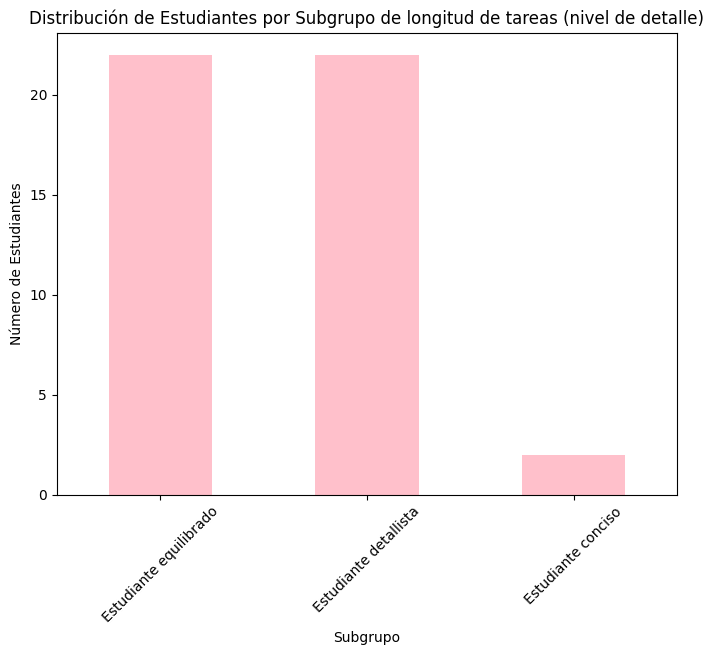

In [77]:
import matplotlib.pyplot as plt

# Contar cuántos estudiantes están en cada subgrupo
conteo_subgrupos = resultados["Subgrupo"].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
conteo_subgrupos.plot(kind="bar", color="pink")
plt.title(
    "Distribución de Estudiantes por Subgrupo de longitud de tareas (nivel de detalle)"
)
plt.xlabel("Subgrupo")
plt.ylabel("Número de Estudiantes")
plt.xticks(rotation=45)
plt.show()

Agrupación por cantidad de palabras distintas usadas por el estudiante en sus tareas, se busca saber en qué nivel de vocabulario se encuentra:

1.  Vocabulario Limitado: Se refiere a alguien que utiliza un conjunto restringido de palabras en sus escritos, lo que puede indicar una expresión lingüística limitada.
2.  Vocabulario Variado: Se refiere a alguien que utiliza una variedad de palabras en sus escritos, lo que sugiere una expresión lingüística diversa y rica.
3.  Vocabulario Extenso: Se refiere a alguien que utiliza un amplio rango de palabras diferentes en sus escritos, lo que indica una habilidad notable para comunicarse con precisión y sofisticación lingüística.


In [78]:
# Define los rangos para la clasificación
criterios = {
    "Estudiante con vocabulario limitado": (50, 250),
    "Estudiante con vocabulario variado": (250, 400),
    "Estudiante con vocabulario extenso": (400, float("inf")),
}


# Función para asignar subgrupos según la longitud promedio de las tareas para cada estudiante
def asignar_subgrupo(palabras_unic):
    for subgrupo, (min_valor, max_valor) in criterios.items():
        if min_valor <= palabras_unic <= max_valor:
            return subgrupo


resultados["Subgrupo"] = resultados["Palabras Únicas"].apply(asignar_subgrupo)

# Mostrar la clasificación resultante
print(resultados[["Estudiante", "Palabras Únicas", "Subgrupo"]])

    Estudiante  Palabras Únicas                             Subgrupo
0            0              349   Estudiante con vocabulario variado
1            1              429   Estudiante con vocabulario extenso
2            2              414   Estudiante con vocabulario extenso
3            3              304   Estudiante con vocabulario variado
4            4              540   Estudiante con vocabulario extenso
5            5              267   Estudiante con vocabulario variado
6            6              411   Estudiante con vocabulario extenso
7            7              326   Estudiante con vocabulario variado
8            8              153  Estudiante con vocabulario limitado
9            9              263   Estudiante con vocabulario variado
10          10              334   Estudiante con vocabulario variado
11          11              404   Estudiante con vocabulario extenso
12          12              345   Estudiante con vocabulario variado
13          13              113  E

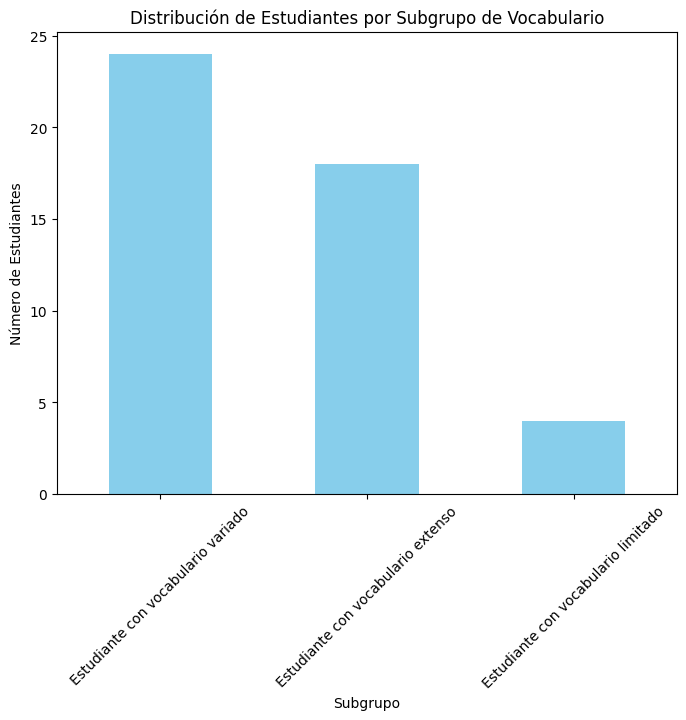

In [81]:
import matplotlib.pyplot as plt

# Contar cuántos estudiantes están en cada subgrupo
conteo_subgrupos = resultados["Subgrupo"].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
conteo_subgrupos.plot(kind="bar", color="skyblue")
plt.title("Distribución de Estudiantes por Subgrupo de Vocabulario")
plt.xlabel("Subgrupo")
plt.ylabel("Número de Estudiantes")
plt.xticks(rotation=45)

plt.show()

# **Conclusiones**

- Para iniciar el análisis de los datos, lo primero que se hizó fue pre-procesar la data, removiendo stopwords, pasandolo todo a minúsculas y tokenizando.

- Para el análisis de cada estudiante se decidió revisar la longitud promedio de las 6 tareas, las palabras diferentes que utilizó y por último las 5 palabras que más repitió, mostrando la cantidad de veces.

  Se crearon dos análisis de similitud:

  1. Similitud entre todos los estudiantes, para esto se concatenó el texto de las 6 tareas para cada estudiante.
  2. Similitud entre las 6 tareas de cada estudiante, para esto se generó una matriz para cada estudiante.

Para el punto de clasificación por género, se hicieron dos clasificadores utilizando una regresión logística.

1. Clasificador con data desbalanceada: **Accuracy** 0.70
2. Casificador con data balanceada: **Accuracy** 0.87 (se utilizó un oversampling)

Por último, se establecieron dos clasificadores de subgrupos:

1. Distribución de Estudiantes por Subgrupo de longitud de tareas (nivel de detalle): "Estudiante conciso", "Estudiante equilibrado", "Estudiante detallista"

En este caso se asume que entre más largo el texto de la tarea el estudiante es más detallista. 2. Distribución de Estudiantes por Subgrupo de Vocabulario: "Estudiante con vocabulario extenso", "Estudiante con vocabulario variado", "Estudiante con vocabulario limitado"

Como conclusión de este último punto, se tiene que la mayoría de estudiantes se encuentran en el gupo de estudiantes moderados en su nivel de detalle y con vocabulario variado.
